<h1 style='color:Navy' align='center'>Data Science Regression Project: Predicting Insurance cost </h1>

<h2 style='color:blue'>Data Load: Load Insurance data into a DataFrame</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 


<h3 style='color:blue'>Data cleaning..</h3>

In [2]:
df1 = pd.read_csv("insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df1.shape

(1338, 7)

In [7]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df1 = df1.drop_duplicates( keep='last')

In [9]:
df1.shape

(1337, 7)

In [11]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<h3 style='color:blue'>Feature engineering</h3>

C:\Users\AK\AppData\Local\Temp\ipykernel_7968\679069975.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[x], ax=axes[0], kde=False)
C:\Users\AK\AppData\Local\Temp\ipykernel_7968\679069975.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[x], ax=axes[0], kde=False)
C:\Users\AK\AppDat

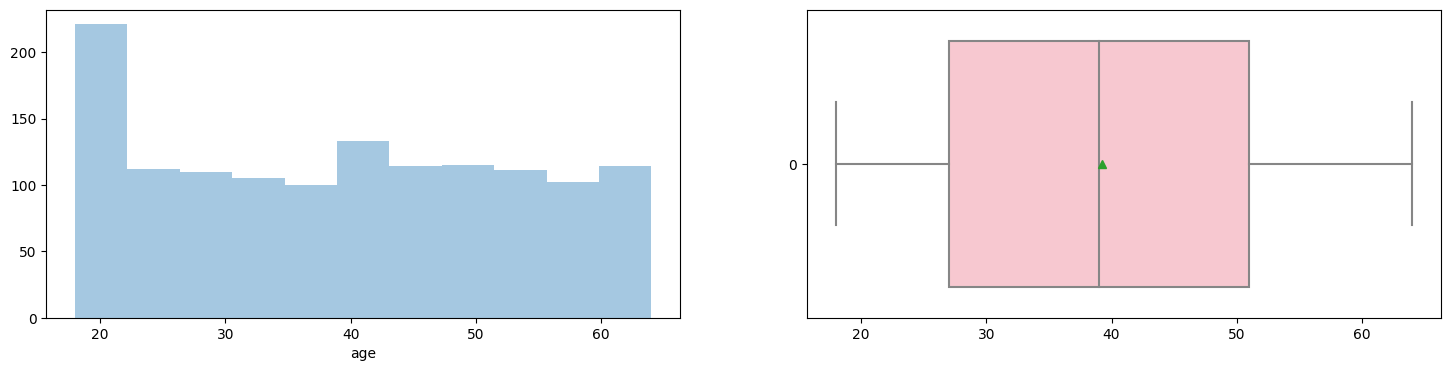

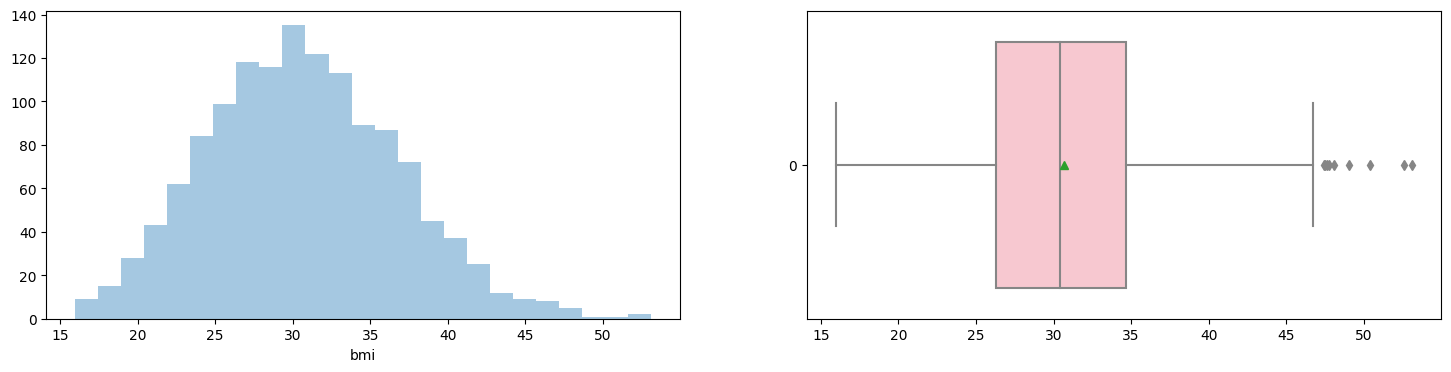

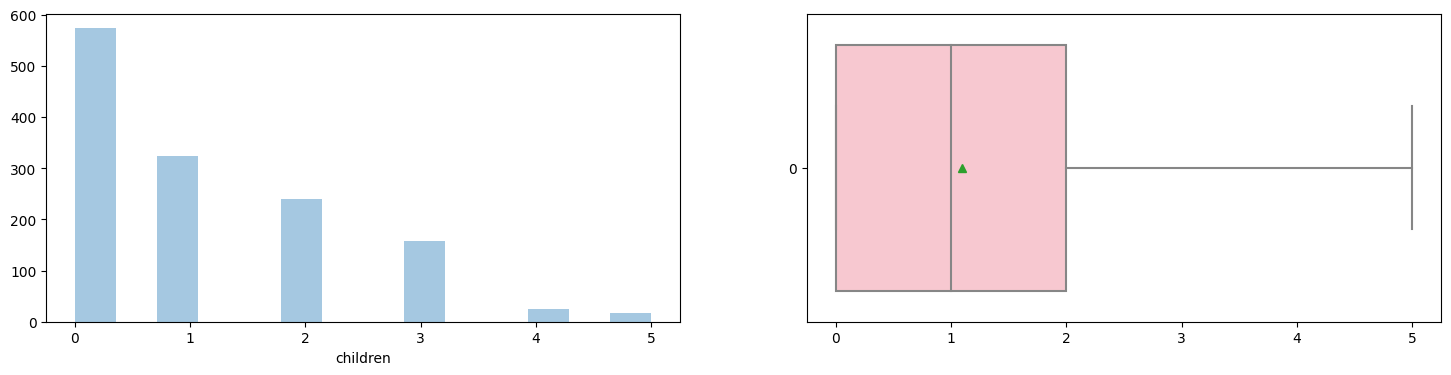

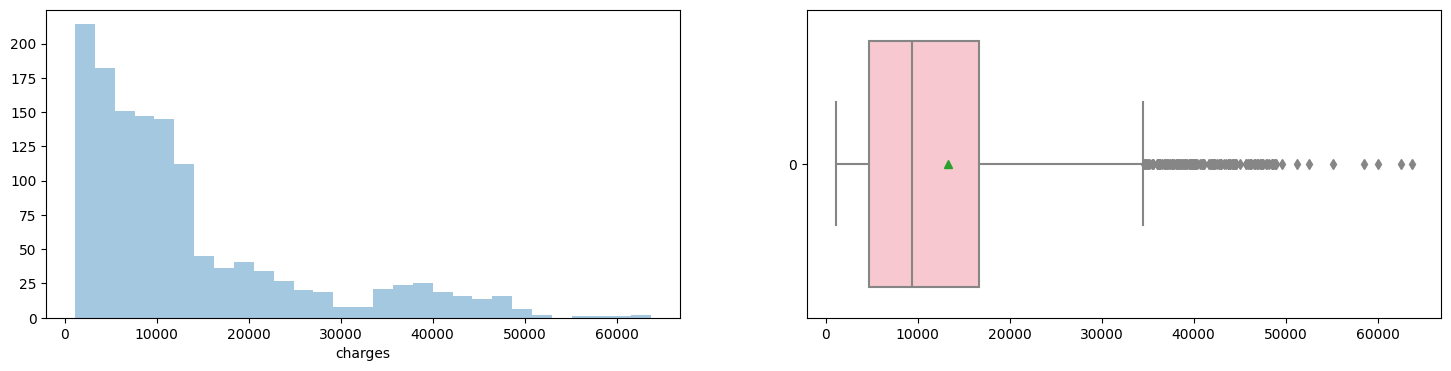

In [12]:
x_axis=['age', 'bmi', 'children', 'charges']

for x in x_axis:
    fig, axes = plt.subplots(1,2, figsize=(18,4))
    sns.distplot(df1[x], ax=axes[0], kde=False)
    sns.boxplot(df1[x], ax=axes[1], orient="h", showmeans=True, color="pink")

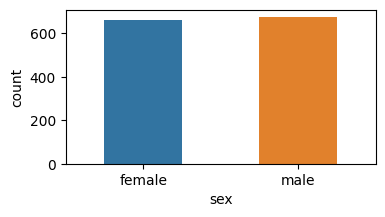

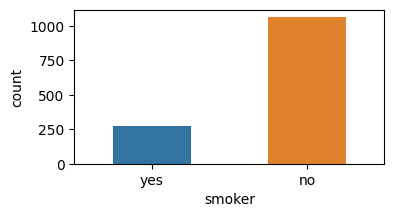

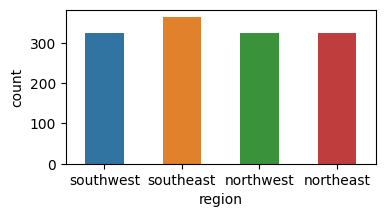

In [13]:
x_axis=['sex', 'smoker', 'region',]

for x in x_axis:
    fig, axes = plt.subplots(1, figsize=(4,2))
    sns.countplot(df1, x=df1[x],width=.5)

In [14]:
correlation = df1.corr()
correlation

C:\Users\AK\AppData\Local\Temp\ipykernel_7968\3974793788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<AxesSubplot:>

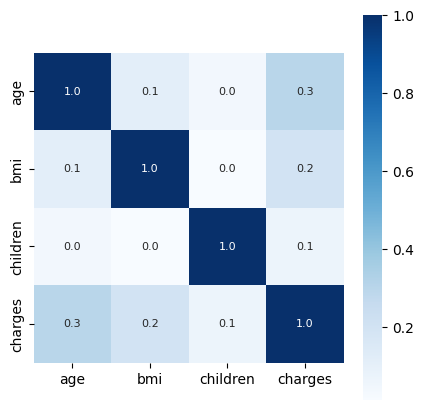

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [16]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [17]:
df2 = df1.copy()
df2['sex']=df2.sex.map({'female':0,'male':1})

In [18]:
df2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
df2.smoker.unique()

array(['yes', 'no'], dtype=object)

In [20]:
df2['region']=df2.region.map({'southwest':0,'southeast':1, 'northwest':2, 'northeast':3})
df2['smoker']=df2.smoker.map({'no':0,'yes':1})

In [21]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<h3 style='color:blue'>Model building</h3>

In [22]:
from sklearn.model_selection import train_test_split

X = df2.drop('charges',axis=1)
y = df2.charges

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=.2, random_state=2025
)

In [23]:
X_train.shape

(1069, 6)

In [24]:
X_test.shape

(268, 6)

In [25]:
y_train.shape

(1069,)

In [26]:
y_test.shape

(268,)

In [76]:
# Linear REgression Model

In [27]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7564862099958225

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75214032, 0.77414461, 0.7924388 , 0.73071822, 0.8038815 ])

<h3 style='color:blue'>Find best model using GridSearchCV</h3>

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                 'bootstrap': [True,False],
                 'max_depth': [70,30],
                 'n_estimators': [400,100]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'XGboostRegreesor': {
            'model': xgb.XGBRegressor(),
            'params': {
                'n_estimators': [100, 400],
                'max_depth': [3, 6, 9],
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\AK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\AK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 177, in fi

,model,best_score,best_params
0,RandomForestRegressor,0.860449,"{'bootstrap': True, 'max_depth': 30, 'n_estima..."
1,decision_tree,0.767512,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,XGboostRegreesor,0.863552,"{'max_depth': 3, 'n_estimators': 100}"


<h3 style='color:blue'>Chose RandomForestRegressor as best model</h3>

In [52]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8511202096053925

<h3 style='color:blue'>Testing the model using a dummy data</h3>

In [58]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [69]:
test_df = pd.DataFrame([{'age':45, 'sex':1, 'bmi':30,'children':3, 'smoker':1, 'region':3}])
test_df

,age,sex,bmi,children,smoker,region
0,45,1,30,3,1,3


In [70]:
rf_model.predict(test_df)

array([33247.7631563])

<h3 style='color:blue'>Save the model using joblib</h3>

In [71]:
import joblib

In [73]:
joblib.dump(rf_model,"insurance_model.h5")

['insurance_model.h5']